Bienvenidos al segundo notebook de este analisis de siniestros viales, en esta ocasion observaremos un set de datos de lesiones y no homicidios, vamos a ello.

In [238]:
#importamos las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [239]:
#extraemos los datos de la tabla de hechos y la tabla de victimas
lesiones_excel = pd.ExcelFile('data/lesiones.xlsx')
sheets = lesiones_excel.sheet_names
lesiones = lesiones_excel.parse(sheets[0])
victimas = lesiones_excel.parse(sheets[2])


Pudimos observar ciertos problemas a la hora de hacer un merge en estas tablas, por lo que preprocesamos un poco los datos antes de unirlos.

In [240]:
#eliminamos columnas no relevantes
lesiones.drop(columns=['otra_direccion', 'altura', 'participantes', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista', 'direccion_normalizada', 'calle'], inplace=True)
#renombramos las columnas para mas comodidad de uso
lesiones.rename(columns={'aaaa': 'anio', 'mm': 'mes', 'dd': 'dia', 'latutid': 'latitud'}, inplace=True)
#ingresamos el indice
lesiones.set_index('id')

,n_victimas,anio,mes,dia,fecha,hora,franja_hora,comuna,tipo_calle,cruce,geocodificacion_CABA,longitud,latitud,victima,acusado,gravedad
id,,,,,,,,,,,,,,,,
LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD
LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,SD
LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD
LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,SD
LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,9,AVENIDA,GUAMINI,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,SD,SD,SD
LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,9,AVENIDA,NaN,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,SD,SD,SD
LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,1,SD,NaN,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,SD,SD,SD


In [241]:
#repetimos lo anterior con la tabla de victimas tambien
victimas.drop(columns={'AAA', 'MM', 'DD', 'FECHA ', 'GRAVEDAD'}, inplace=True)
victimas.rename(columns={'ID hecho': 'id', 'VEHICULO_VICTIMA': 'vehiculo', 'SEXO': 'sexo', 'EDAD_VICTIMA': 'edad'}, inplace=True)
victimas.set_index('id')

,vehiculo,sexo,edad
id,,,
LC-2019-0000053,sd,Varon,57
LC-2019-0000063,sd,SD,SD
LC-2019-0000079,sd,Varon,SD
LC-2019-0000082,sd,Varon,45
LC-2019-0000082,sd,Mujer,45
...,...,...,...
LC-2021-0451911,TRANSPORTE PUBLICO,Varon,87
LC-2021-0530228,TRANSPORTE PUBLICO,Mujer,60
LC-2021-0530228,TRANSPORTE PUBLICO,Mujer,32


In [242]:
#unimos las dos tablas en una sola llamada lesiones
lesiones = pd.merge(lesiones, victimas, on='id')

In [243]:
lesiones.shape

(27598, 20)

In [244]:
lesiones.head(1)

,id,n_victimas,anio,mes,dia,fecha,hora,franja_hora,comuna,tipo_calle,cruce,geocodificacion_CABA,longitud,latitud,victima,acusado,gravedad,vehiculo,sexo,edad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD,sd,SD,SD


In [245]:
lesiones.describe()

,n_victimas,anio,mes,dia
count,27598.000000,27598.000000,27598.000000,27598.000000
mean,1.422494,2019.897166,6.617617,15.617726
std,1.087866,0.860914,3.479183,8.683099
min,1.000000,2019.000000,1.000000,1.000000
25%,1.000000,2019.000000,3.000000,8.000000
50%,1.000000,2020.000000,7.000000,16.000000
75%,1.000000,2021.000000,10.000000,23.000000
max,16.000000,2021.000000,12.000000,31.000000


Como era de esperar la funcion describe() no hace nos brinda mucha ayuda por lo que tendremos que hacer nuestro propio analisis, primero procesemos los datos, revisemos por valores faltantes.

In [246]:
def cuenta_nulos(df):
    nulos_por_columna = {}
    for columna in df.columns:
        if df[columna].isnull().sum() > 0:
            nulos = df[columna].isnull().sum()
            nulos_por_columna[columna] = nulos

    return nulos_por_columna


resultado = cuenta_nulos(lesiones)
resultado

{'franja_hora': 5,
 'comuna': 178,
 'cruce': 16713,
 'geocodificacion_CABA': 39,
 'longitud': 270,
 'latitud': 270}

Vemos varias columnas con problemas de faltantes, nos ocupemos rapidamente de ellas ya que no nos dan mucha informacion relevante sobre los choques mas alla de la columna de 'cruce' y 'comuna'

In [247]:
#utilizaremos ffill() como funcion para los datos que nos estan faltando en varios casos, pero nuestro set de 
#datos esta demasiado borroso, por lo que muchos de estos datos que estan faltando y no son relevantes seran eliminados

lesiones.franja_hora.ffill(inplace=True)
lesiones.comuna.ffill(inplace=True)
lesiones.cruce.fillna('SD', inplace=True)
lesiones.longitud.fillna('0', inplace=True)
lesiones.latitud.fillna('0', inplace=True)
lesiones.geocodificacion_CABA.fillna('0', inplace=True)
lesiones = lesiones[lesiones['vehiculo'] != 'sd']
lesiones = lesiones[lesiones['vehiculo'] != 'SD']
lesiones = lesiones[lesiones['sexo'] != 'SD']
lesiones = lesiones[lesiones['sexo'] != 'sd']
lesiones.sexo = lesiones.sexo.str.lower()
lesiones.sexo = lesiones.sexo.str.strip()
lesiones = lesiones[lesiones.edad != 'sd']
lesiones = lesiones[lesiones.edad != 'SD']
lesiones.gravedad = lesiones.gravedad.str.lower()
lesiones.gravedad.replace('sd', 'leve', inplace=True)

In [248]:
cuenta_nulos(lesiones)

{}

Ahora que no tenemos los valores faltantes revisemos por los duplicados.

In [249]:
print(f'cantidad de filas duplicadas: {lesiones.duplicated().sum()}')
lesiones.drop_duplicates(inplace=True)

cantidad de filas duplicadas: 31


In [250]:
lesiones.shape

(9925, 20)

Eliminamos las 31 filas duplicadas y nos quedan 9925 filas, aun asi hay columnas como victima y acusado que poseen datos nulos, por lo que no aportaran informacion relevante esas filas, eliminemos todas las filas que no posean estos datos.

In [251]:
lesiones = lesiones[lesiones.victima != 'SD']
lesiones = lesiones[lesiones.acusado != 'SD']

In [252]:
lesiones.shape

(8294, 20)

Ahora que tenemos algo mas real en cuanto a los datos, procedamos a convertir cada columna al tipo de dato que corresponde.

In [253]:
lesiones.dtypes

id                      object
n_victimas               int64
anio                     int64
mes                      int64
dia                      int64
fecha                   object
hora                    object
franja_hora             object
comuna                  object
tipo_calle              object
cruce                   object
geocodificacion_CABA    object
longitud                object
latitud                 object
victima                 object
acusado                 object
gravedad                object
vehiculo                object
sexo                    object
edad                    object
dtype: object

In [254]:
lesiones.fecha = pd.to_datetime('fecha', errors='coerce')
lesiones.fecha.dropna(axis=0, inplace=True)

lesiones.replace('sd', '0', inplace=True)
lesiones.franja_hora = lesiones.franja_hora.astype(int)

lesiones.tipo_calle = lesiones.tipo_calle.astype('category')
lesiones.victima = lesiones.victima.astype('category')
lesiones.acusado = lesiones.acusado.astype('category')
lesiones.gravedad = lesiones.gravedad.astype('category')


lesiones.vehiculo = lesiones.vehiculo.astype('category')
lesiones.sexo = lesiones.sexo.astype('category')
lesiones.edad = lesiones.edad.astype(int)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 100]

# Aplicar la división en rangos etarios usando pd.cut()
lesiones['edad'] = pd.cut(lesiones['edad'], bins=bins, labels=labels)


Ya modificados los tipos de datos de las columnas podemos comenzar con el analisis de nuestros datos y sacar conclusiones para nuestro labor.

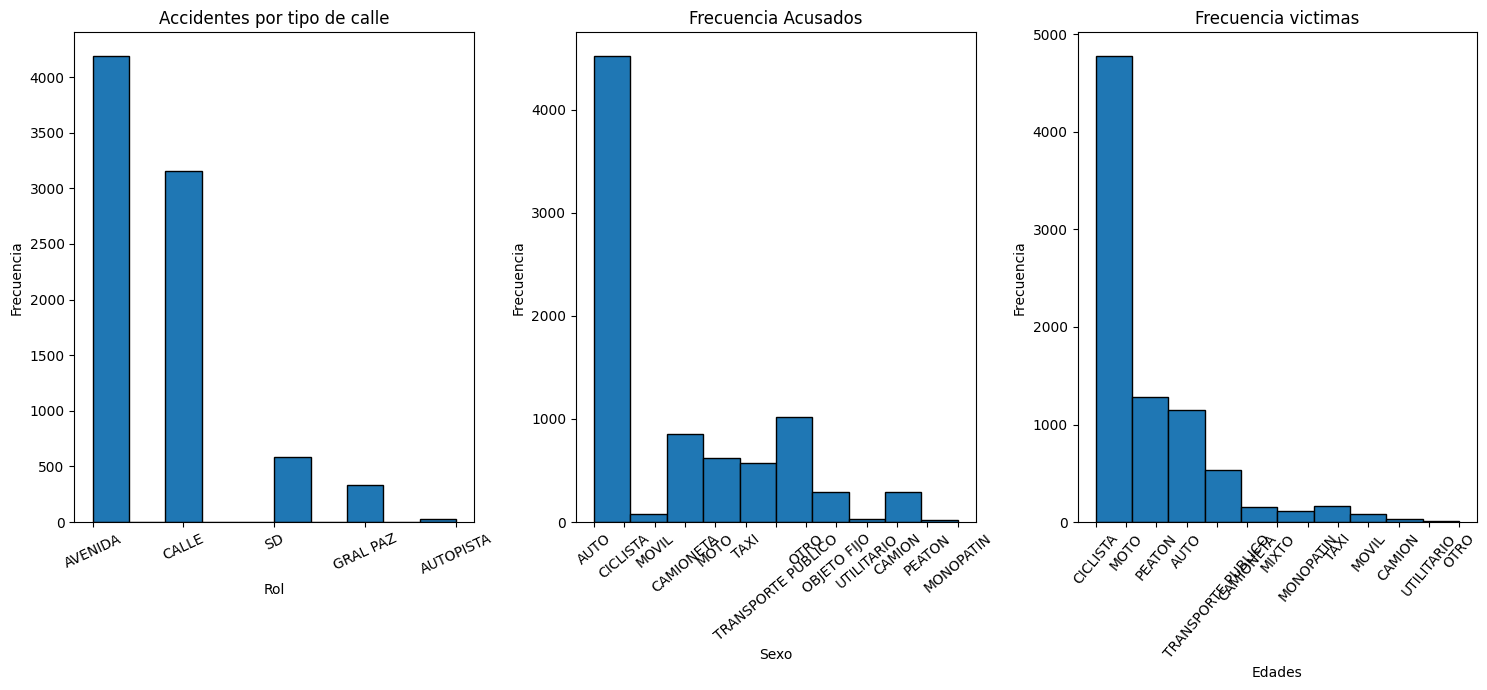

In [255]:
categorias = {
    'tipo_calle': lesiones['tipo_calle'].values,
    'acusado': lesiones['acusado'].values,
    'victima': lesiones['victima'].values
}

df_lesiones_hist = pd.DataFrame(categorias)

titulos_lesiones = ["Accidentes por tipo de calle", "Frecuencia Acusados", "Frecuencia victimas"]
x_lesiones = ['Rol', 'Sexo', 'Edades']
rotation_cat = [25, 40, 50]

# Crear una figura con tres subplots en una fila (1 fila y 3 columnas)
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# Generar un histograma para cada serie en su respectivo subplot
for i, col in enumerate(['tipo_calle', 'acusado', 'victima']):
    axs[i].hist(df_lesiones_hist[col], edgecolor='black')
    axs[i].set_xlabel(x_lesiones[i])
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title(titulos_lesiones[i])
    axs[i].tick_params(axis='x', rotation=rotation_cat[i])

plt.tight_layout()  # Para evitar superposiciones
plt.show()

Podemos observar que a dierencia de la tabla de homicidios la mayoria de las victimas por lesiones son ciclistas y no motociclistas como en los casos fatales, aun persisten la mayoria de accidentes en avenidas y calles y los acusados principalmente conducen un automovil.

Observemos la gravedad de las victimas con respecto al vehiculo que utilizan

In [256]:
lesiones.gravedad.replace('GRAVE', 'grave', inplace=True)
lesiones.gravedad.replace('0', 'LEVE', inplace=True)
mask_gravedad = lesiones[lesiones.gravedad != 'SD']

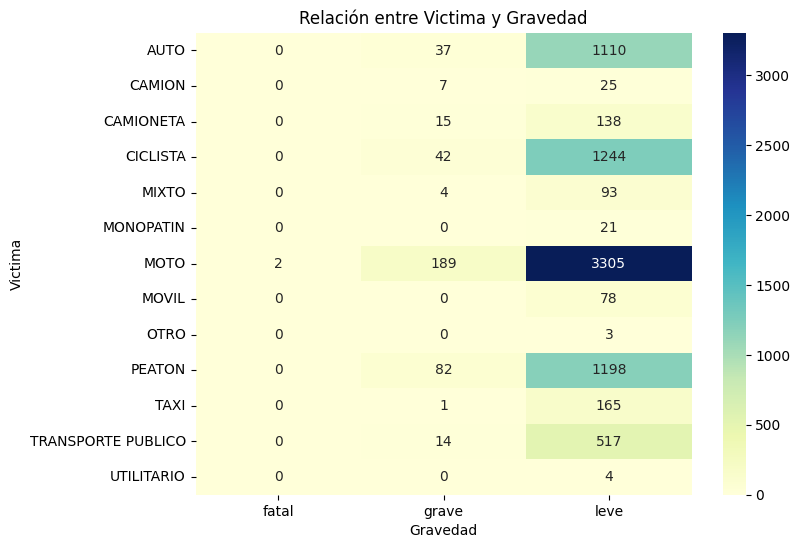

In [257]:
cross_tab = pd.crosstab(mask_gravedad['victima'], mask_gravedad['gravedad'])

# Crear un gráfico de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Victima y Gravedad')
plt.xlabel('Gravedad')
plt.ylabel('Victima')
plt.show()

In [258]:
lesiones.cruce.fillna('no', inplace=True)
lesiones.cruce.replace('SD', 'no', inplace=True)
lesiones['cruce'] = lesiones['cruce'].apply(lambda x: 'si' if x != 'no' else x)

Ahora si bien los ciclistas son de los mas accidentados, suelen poseer heridas leves, mientras que los que mas tienden a lastimarse siguen siendo los motociclistas.

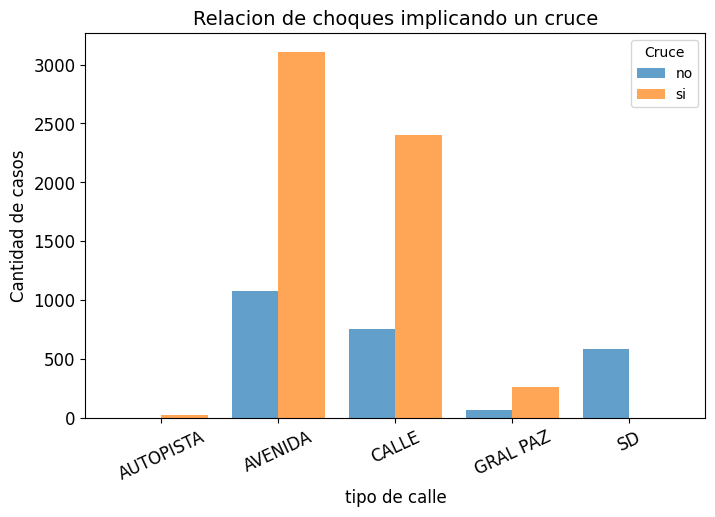

In [259]:
calle_cruce = pd.crosstab(lesiones['tipo_calle'], lesiones['cruce'])
ax = calle_cruce.plot(kind='bar', stacked=False, figsize=(8, 5), width=0.8, alpha=0.7)
plt.legend(title='Cruce')
plt.xticks(fontsize=12, rotation=25)
plt.yticks(fontsize=12)
plt.title('Relacion de choques implicando un cruce', fontsize=14)
plt.xlabel('tipo de calle', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.show()

damos por echo que la mayoria de los accidentes ocurren en cruces, por lo que va a ser un tema a revisar para nuestras recomendaciones

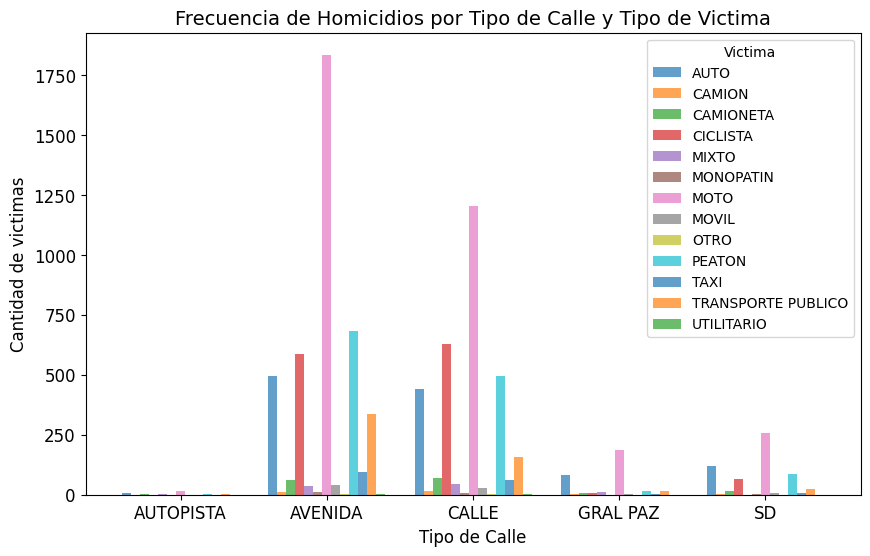

In [260]:
avenidas_acc = pd.crosstab(lesiones['tipo_calle'], lesiones['victima'])

ax = avenidas_acc.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, alpha=0.7)
plt.legend(title='Victima')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Frecuencia de Homicidios por Tipo de Calle y Tipo de Victima', fontsize=14)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Cantidad de victimas', fontsize=12)
plt.show()

Las motos se llevan el premio a ser las principales victimas en los accidentes de trafico.

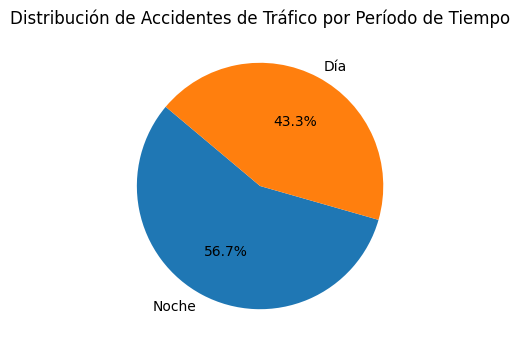

In [261]:
lesiones['hora'] = pd.to_datetime(lesiones['hora'], format='%H:%M:%S', errors='coerce')

lesiones['dia_noche'] = lesiones['hora'].apply(lambda x: 'Día' if 6 <= x.hour < 19 else 'Noche')


conteo_periodo = lesiones['dia_noche'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(conteo_periodo, labels=conteo_periodo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Accidentes de Tráfico por Período de Tiempo')
plt.show()

A diferencia de la tabla de homicidios, la mayoria de los accidentes de transito con lesiones implicadas se producen en la noche.

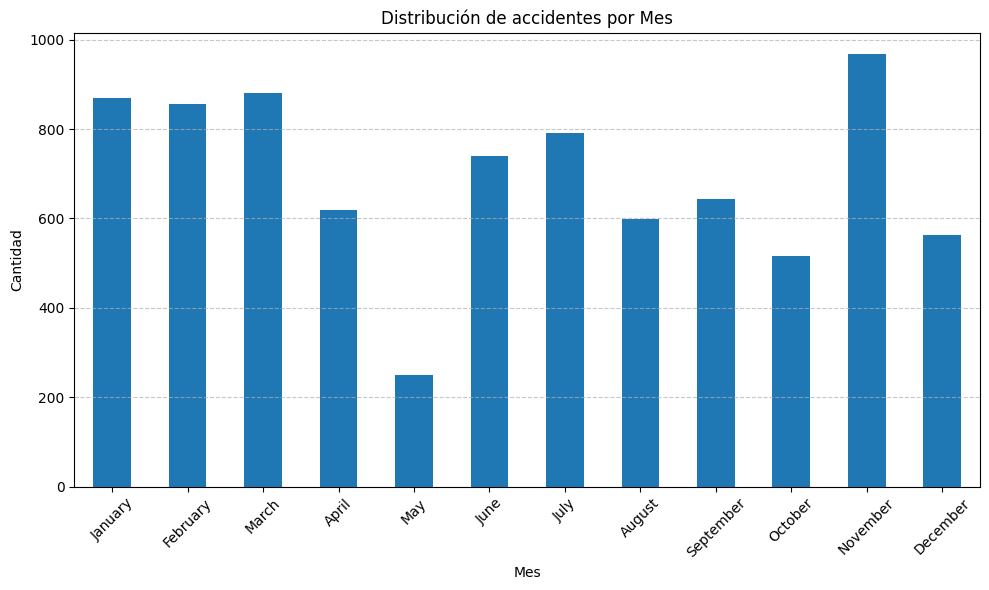

In [262]:
lesiones['mes'] = lesiones['mes'].apply(lambda x: calendar.month_name[x])


conteo_mes = lesiones['mes'].value_counts().reindex(calendar.month_name[1:])  


plt.figure(figsize=(10, 6))
conteo_mes.plot(kind='bar')
plt.title('Distribución de accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tambien sorprende ver que diciembre no es el mes con mayor cantidad de accidentes registrados a diferencia con la tabla de homicidios, en este caso es noviembre, lo cual no implica una razon para que los accidentes se produzcan en este mes.

In [263]:
lesiones.to_csv('data_extraida/lesiones_ext.csv')